In [1]:
from google.colab import files
uploaded = files.upload()

Saving Engg_College_Data.csv to Engg_College_Data.csv


In [42]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

college = pd.read_csv('Engg_College_Data.csv')
college

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5
5,6,F,3,4,3,3,4
6,7,G,1,3,1,1,2
7,8,H,4,4,5,5,5
8,9,I,4,4,4,4,4
9,10,J,3,4,3,4,5


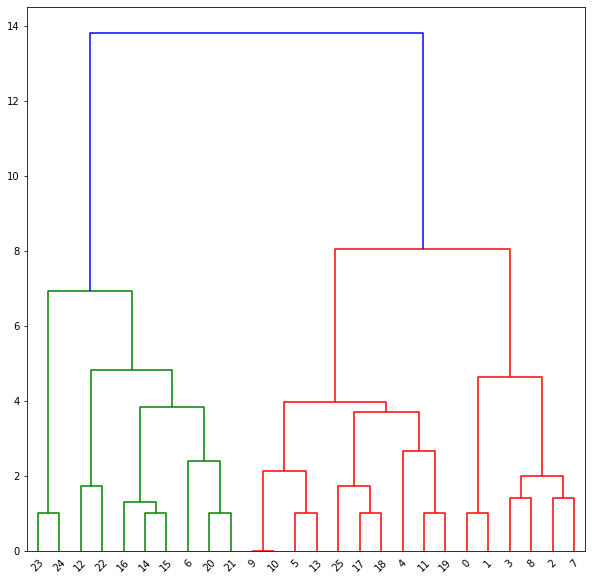

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [44]:
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt
label = fcluster(Z, 10, criterion='distance')
college['pred_scipy'] = label
np.unique(label)

array([1, 2], dtype=int32)

In [45]:
label

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2], dtype=int32)

In [46]:
college['pred_scipy'] = label
college

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,pred_scipy
0,1,A,5,2,5,5,3,2
1,2,B,4,2,5,5,3,2
2,3,C,4,5,5,4,5,2
3,4,D,5,4,5,4,4,2
4,5,E,2,5,2,2,5,2
5,6,F,3,4,3,3,4,2
6,7,G,1,3,1,1,2,1
7,8,H,4,4,5,5,5,2
8,9,I,4,4,4,4,4,2
9,10,J,3,4,3,4,5,2


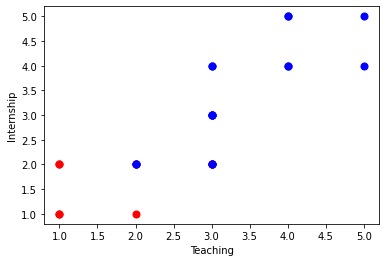

In [47]:
from matplotlib import pyplot as plt
plt.scatter(college.loc[label==1, 'Teaching'], college.loc[label==1, 'Internship'], s=50, marker='o', color='red')
plt.scatter(college.loc[label==2, 'Teaching'], college.loc[label==2, 'Internship'], s=50, marker='o', color='blue')
plt.xlabel('Teaching')
plt.ylabel('Internship')

plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 2])

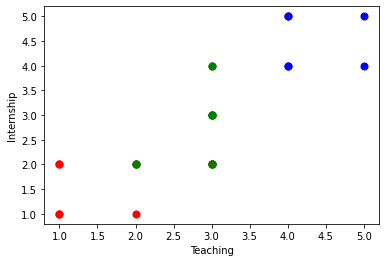

In [53]:
X['pred_sklearn'] = y_hc
plt.scatter(X.loc[y_hc==0, 'Teaching'], X.loc[y_hc==0, 'Internship'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'Teaching'], X.loc[y_hc==1, 'Internship'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'Teaching'], X.loc[y_hc==2, 'Internship'], s=50, marker='o', color='green')
plt.xlabel('Teaching')
plt.ylabel('Internship')

plt.show()